# Obesity Among Children and Adolescents 2-19 Analysis
This notebook contains analysis on obesity amongst children using age, sex, year, race, and other factors to determine what factors make individuals aged 2-19 more likely to be obese.
## Project Introduction
With obesity at all time rates in the United States it is important to understand the individuals most at risk. Obesity is a pressing public health concern with far-reaching implications for everyone. This analysis is focused on the critical issue of obesity among children and adolescents aged 2-19 years, exploring data from selected population characteristics. This information was made available by the Centers of Disease Control and Prevention (CDC) and contains data from 1988-2018. The data gives us access to information regarding percent poverty level, race, hispanic origin, age, and sex of a age range in a given year. Few interesting questions we are investigating are if income is the leading factor in obesity. Though, children and many adolscents do not have income, we can use the poverty level to ask the question if the leading factor of obesity in individuals 2-19 is poverty. Other questions that can be answered are is the trend in obesity the same in all races, or if younger age range are more affected by obesity. 
## Any Changes
As of now, no changes have been made to the scope of the project since the check in. The current scope of the project is 
## Data Cleaning - Obesity Among Children and Adolescents 2-19 Analysis


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from obesity_children import *

### Before Cleaning Data Set
Printed below is the original dataset

In [7]:
obesity_children = pd.read_csv("Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.csv")
obesity_children.head()


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,1988-1994,1,2-19 years,0.0,10.0,0.5,NaN
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,1999-2002,2,2-19 years,0.0,14.8,0.7,NaN
2,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2001-2004,3,2-19 years,0.0,16.3,0.8,NaN
3,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2003-2006,4,2-19 years,0.0,16.3,0.9,NaN
4,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2005-2008,5,2-19 years,0.0,16.2,0.9,NaN


In [8]:
obesity_single_unique = remove_single_unique(obesity_children)
obesity_clean = remove_num_columns(obesity_single_unique)
sex_race_his_obesity, race_his_obesity, total_obesity, poverty_obesity, sex_obesity, age_obesity = final_clean(obesity_clean)

### After Cleaning Data Set
The functions above were called to clean the data. Below are the cleaned datasets split into categories based on population characteristics.

In [9]:
total_obesity.head()

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE,FLAG
0,2-19 years,Total,2-19 years,1988-1994,2-19 years,10.0,0.5,NaN
1,2-19 years,Total,2-19 years,1999-2002,2-19 years,14.8,0.7,NaN
2,2-19 years,Total,2-19 years,2001-2004,2-19 years,16.3,0.8,NaN
3,2-19 years,Total,2-19 years,2003-2006,2-19 years,16.3,0.9,NaN
4,2-19 years,Total,2-19 years,2005-2008,2-19 years,16.2,0.9,NaN


In [10]:
poverty_obesity.head()

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE,FLAG
171,2-19 years,Percent of poverty level,Below 100%,1988-1994,2-19 years,12.6,1.2,NaN
172,2-19 years,Percent of poverty level,Below 100%,1999-2002,2-19 years,17.6,1.1,NaN
173,2-19 years,Percent of poverty level,Below 100%,2001-2004,2-19 years,17.9,1.3,NaN
174,2-19 years,Percent of poverty level,Below 100%,2003-2006,2-19 years,18.9,1.4,NaN
175,2-19 years,Percent of poverty level,Below 100%,2005-2008,2-19 years,19.9,1.4,NaN


In [11]:
sex_race_his_obesity.head()

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE,FLAG
80,2-19 years,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,1988-1994,2-19 years,10.6,0.8,NaN
81,2-19 years,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,1999-2002,2-19 years,16.0,0.9,NaN
82,2-19 years,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,2001-2004,2-19 years,16.0,1.0,NaN
83,2-19 years,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,2003-2006,2-19 years,17.4,1.0,NaN
84,2-19 years,Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black or African...,2005-2008,2-19 years,17.8,1.3,NaN


In [12]:
race_his_obesity["STUB_LABEL"].unique()

array(['Not Hispanic or Latino: White only',
       'Not Hispanic or Latino: Black or African American only',
       'Not Hispanic or Latino: Asian only',
       'Hispanic or Latino: All races',
       'Hispanic or Latino: Mexican: All races'], dtype=object)

## Exploratory Data Analysis (EDA) 
The graph below depicts the trend of obesity rates over time in individuals aged 2 to 19. The data of obesity percentage estimates span from 1988 to 2018, however, we use the starting dates to better understand the data. The blue graph represents the obesity rate and the orange line represents the standard error for each of the estimates. As seen below, the obesity rate increases dramatically from it being aroung 10% to almost 19% near 2016. Also, the data does not seem to have as much frequent data about obesity in individuals aged 2-19 from 1988-1999. When focused on the data we can see that the majority of data seems to be from 1999-2016. There has been steady increases in obesity with a higher rate of increase from the years 2015 and beyond. The estimates seem consistant and did not increase when the obesity rate increased.

/Users/omgor/CS Projects/CS418/group-project-mind-masters/obesity_children.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_YEAR'] = pd.to_datetime(df['YEAR'].str.split('-', expand=True)[0], format='%Y')


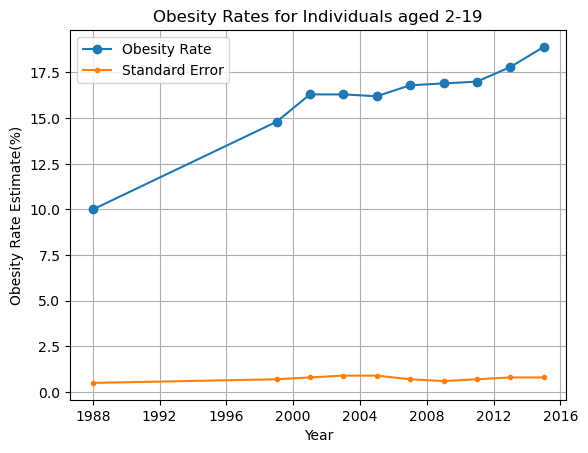

In [13]:
obesity_EDA_visual(total_obesity)

## Visualizations

### Visual 1: Obesity Estimate based on Poverty Level and Age in individuals aged 2-19

/Users/omgor/CS Projects/CS418/group-project-mind-masters/obesity_children.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/omgor/CS Projects/CS418/group-project-mind-masters/obesity_children.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/omgor/CS Projects/CS418/group-project-mind-masters/obesity_children.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

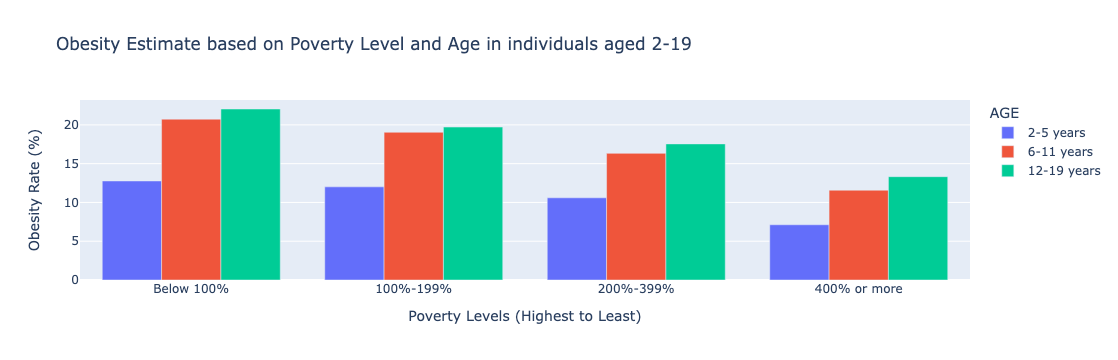

In [20]:
obesity_Visual1(poverty_obesity)

### Visual 2:

/var/folders/1t/tj9yy0zx3c155qtctzmnms9m0000gn/T/ipykernel_8678/446180422.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



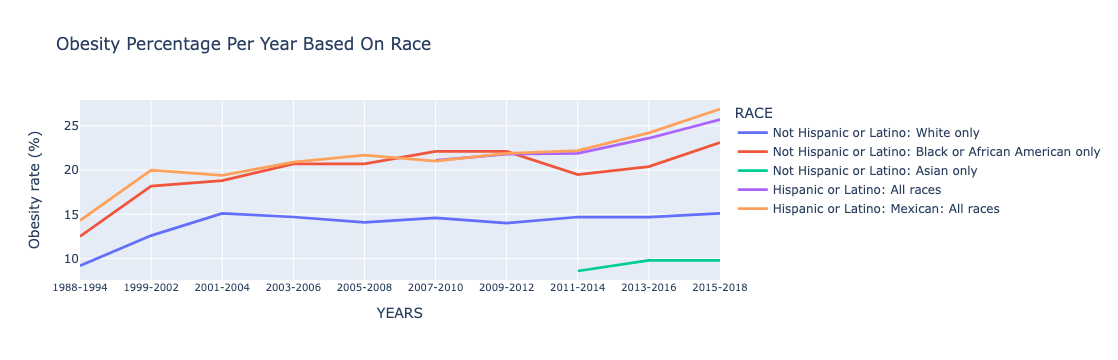

In [21]:
def obesity_Visual2(df):
    df = df.loc[df['AGE'] == '2-19 years']
    df.rename(columns = {"STUB_LABEL": "RACE"}, inplace = True)
    fig = px.line(df, x="YEAR", y="ESTIMATE", color="RACE", title="Obesity Percentage Per Year Based On Race")
    
    fig.update_xaxes(title_text="YEARS", tickfont=dict(size=10))
    fig.update_yaxes(title_text="Obesity rate (%)")
    
    fig.update_traces(line=dict(width=2.75))
    fig.show()

obesity_Visual2(race_his_obesity)

In [257]:
race_his_obesity[race_his_obesity["STUB_LABEL"] == "Not Hispanic or Latino: Asian only"]

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE
50,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,1988-1994,2-19 years,NaN,NaN
51,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,1999-2002,2-19 years,NaN,NaN
52,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2001-2004,2-19 years,NaN,NaN
53,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2003-2006,2-19 years,NaN,NaN
54,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2005-2008,2-19 years,NaN,NaN
55,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2007-2010,2-19 years,NaN,NaN
56,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2009-2012,2-19 years,NaN,NaN
57,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2011-2014,2-19 years,8.6,1.1
58,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2013-2016,2-19 years,9.8,1.2
59,2-19 years,Race and Hispanic origin,Not Hispanic or Latino: Asian only,2015-2018,2-19 years,9.8,1.1


### Visual 3

## Reflections 
**What has been the hardest part of the project encountered so far?** 
+ The hardest part was understanding the raw data and propertly cleaning the data. Many of the column names were differently then expected and knowing how each column correlated with the other columns took a while to understand. Not only that but knowing the different values that can occur in every column and if it was neccesary for the analysis. Only after understanding this can we propertly clean the data and subset the data.
  
**What are your intial insights?**
+ Obesity analysis from individuals 2-19 are
  +
+ Obesity analysis from individuals 22+ are
  +
+ Physical Activity and nutrion
  +

**Are there any concrete results you can show at this point? If not, why not?**
+ .
**Going forward, what are the current biggest problems you’re facing?**
+
**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
+
**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?**
+ 
## Next Steps
**What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.**
+




